In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
d = np.loadtxt('data.txt',skiprows=1)
print(d)

[[ 2.          3.201       5.77470148 ... -0.08273688 -0.31659793
   8.9705947 ]
 [ 1.          1.066       0.51969346 ... -0.05726641  0.12953615
   6.40681803]
 [ 2.          1.395       6.18460515 ... -0.21614335  0.6549017
  17.42562827]
 ...
 [ 1.          0.854       0.97744937 ... -0.14189873  0.35539943
   0.06023684]
 [ 1.          0.03        0.09371179 ... -0.13902791  0.49674919
   0.07933982]
 [ 2.          3.881       5.77286718 ...  0.84925859 -0.92115962
  17.13040574]]


In [49]:
print(type(d))
print(d.shape)

<class 'numpy.ndarray'>
(999, 11)


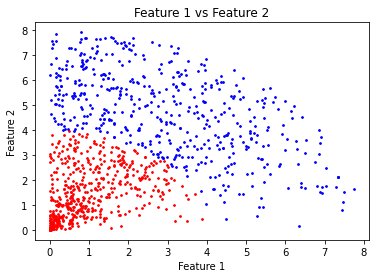

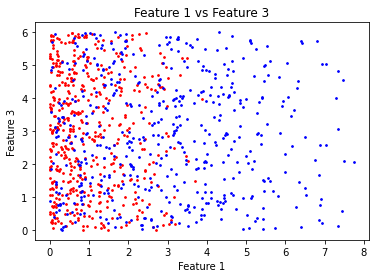

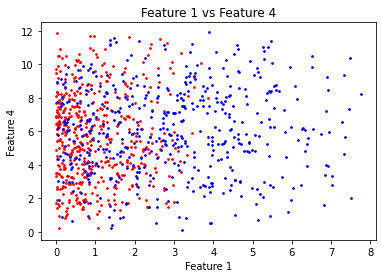

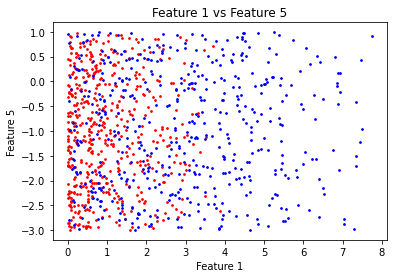

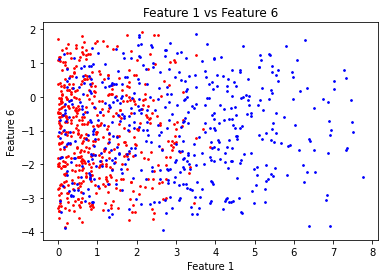

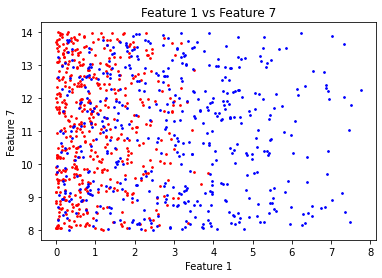

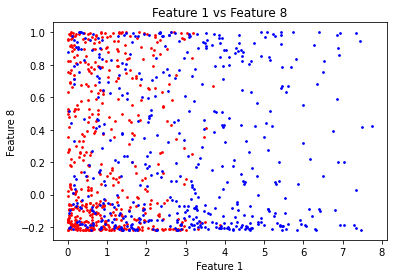

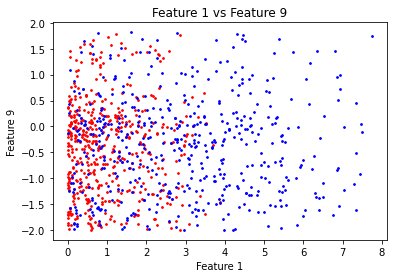

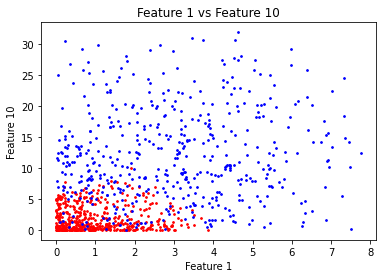

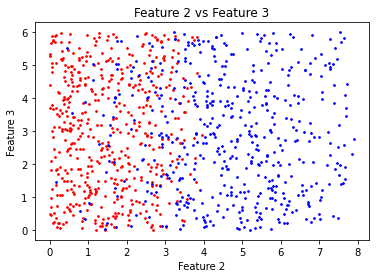

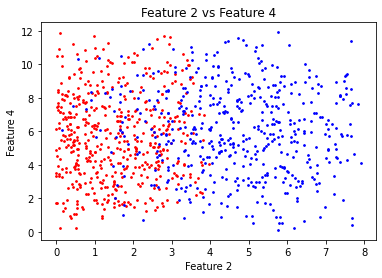

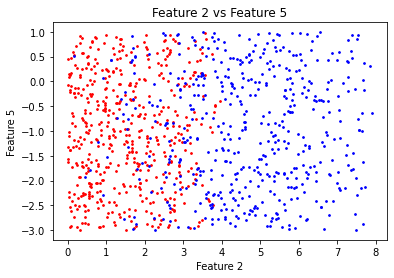

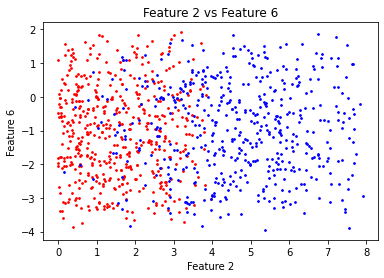

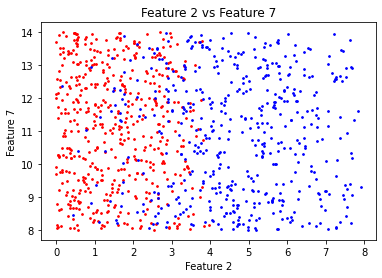

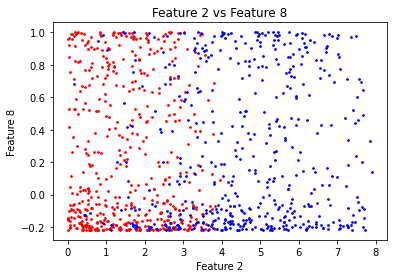

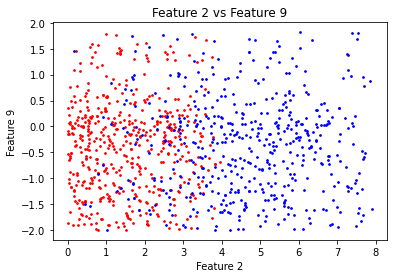

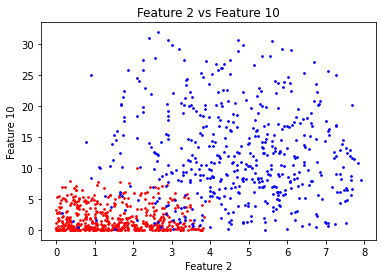

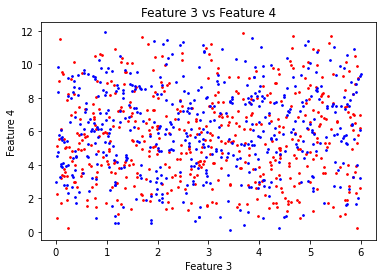

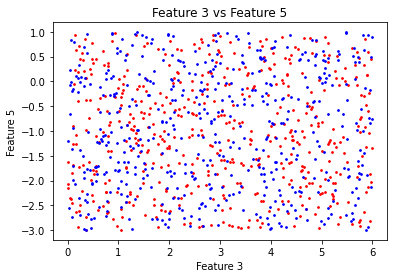

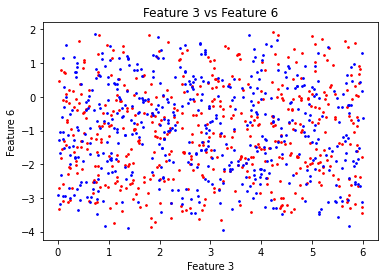

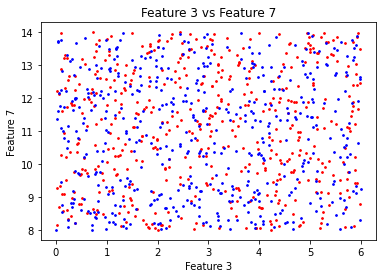

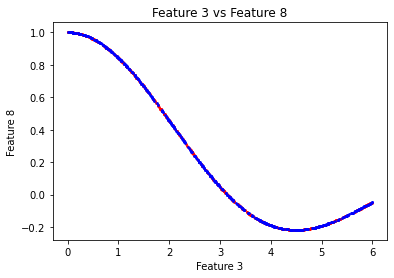

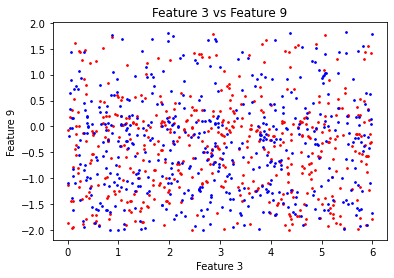

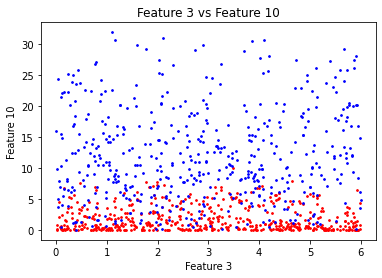

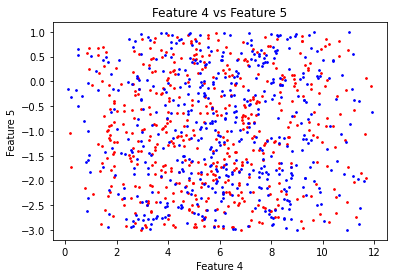

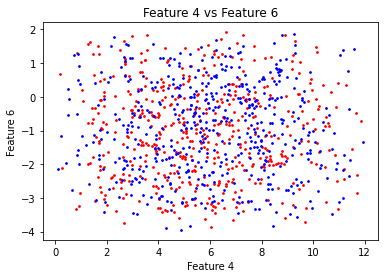

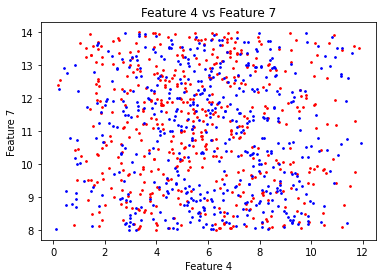

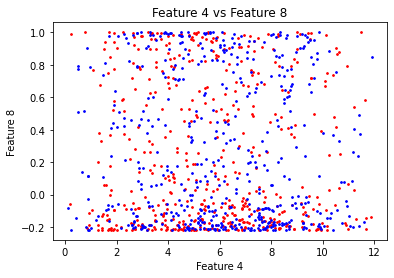

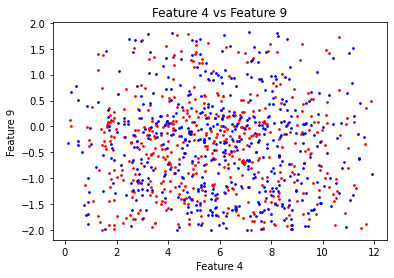

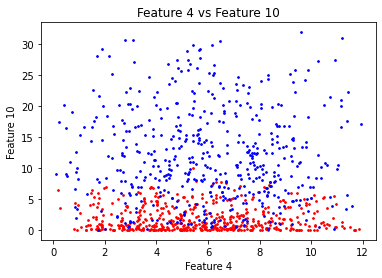

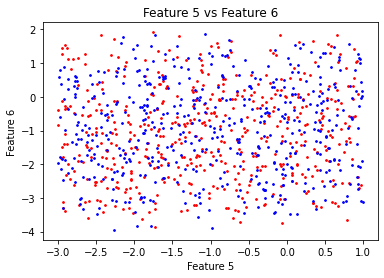

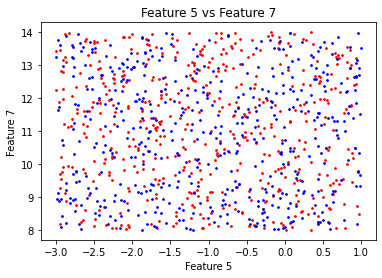

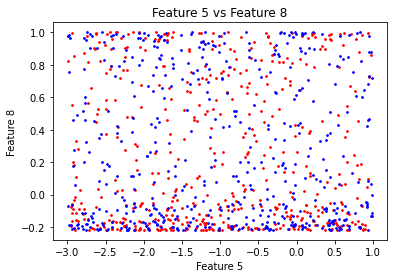

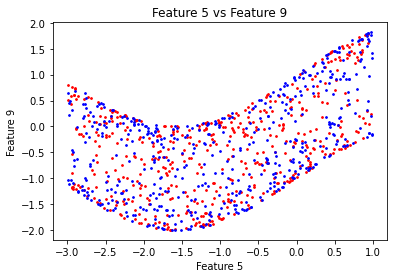

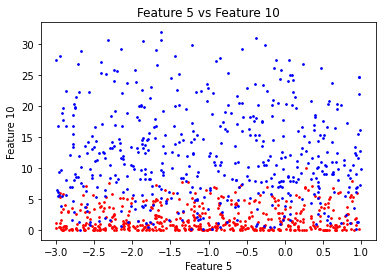

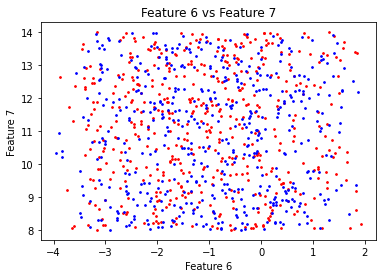

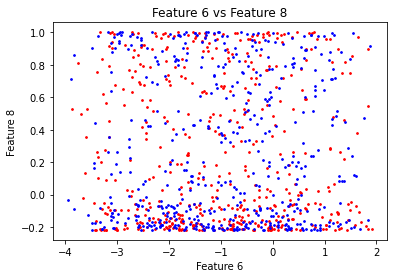

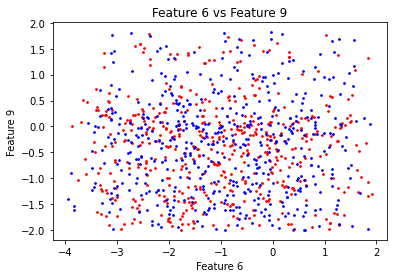

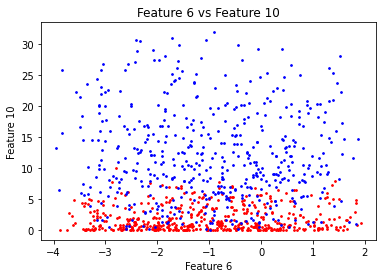

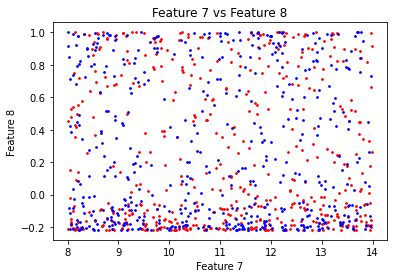

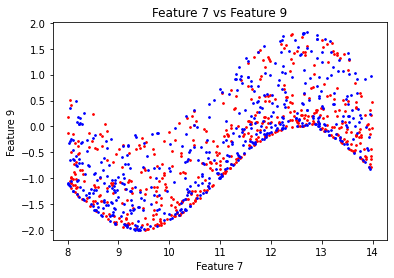

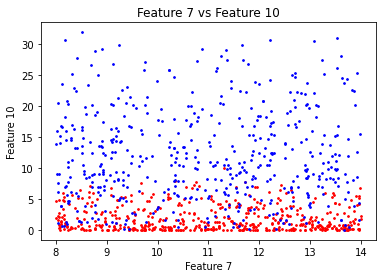

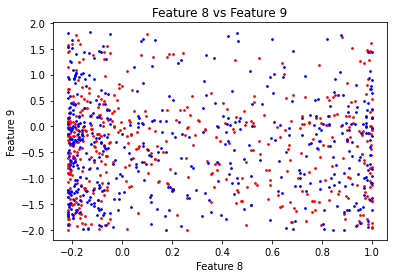

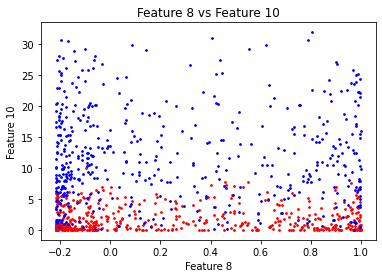

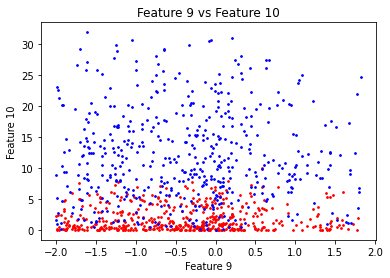

In [10]:
for k in range(1,11):
    x1 = [d[i][k] for i in range(999) if d[i][0]==1]
    x2 = [d[i][k] for i in range(999) if d[i][0]==2]
    for j in range(k+1,11):
        y1 = [d[i][j] for i in range(999) if d[i][0]==1]
        y2 = [d[i][j] for i in range(999) if d[i][0]==2]
        
        plt.scatter(x1,y1,color='r',s=3)
        plt.scatter(x2,y2,color='b',s=3)
        
        plt.title('Feature '+str(k)+' vs Feature '+str(j))
        plt.ylabel('Feature '+str(j))
        plt.xlabel('Feature '+str(k))
        
        plt.show()

Feature 1 & Feature 2 classify the two labels perfectly.

In [50]:
df = pd.read_csv('data.txt',delimiter='\t',names=['Label','1','2','3','4','5','6','7','8','9','10'],skiprows=1)
print(df)

     Label      1         2         3          4         5         6  \
0        2  3.201  5.774701  3.429272   0.108732 -0.146594 -2.140013   
1        1  1.066  0.519693  5.936320   0.194729 -1.031533  0.678119   
2        2  1.395  6.184605  4.393927   0.236128 -0.306630 -1.152583   
3        1  0.062  0.106774  0.227877   0.241525 -1.734883 -2.111483   
4        2  1.416  7.687776  3.696551   0.416807 -0.167303 -1.977925   
..     ...    ...       ...       ...        ...       ...       ...   
994      1  1.866  2.950051  1.702322  11.655344 -1.059964 -0.484756   
995      1  0.966  2.803543  4.665996  11.683653 -1.941229 -2.860437   
996      1  0.854  0.977449  5.408350  11.690255  0.066929 -2.310025   
997      1  0.030  0.093712  3.678407  11.871393 -0.085895 -0.717800   
998      2  3.881  5.772867  0.973869  11.916999 -0.622275 -1.354238   

             7         8         9         10  
0     8.025347 -0.082737 -0.316598   8.970595  
1    12.408875 -0.057266  0.129536   6.

In [12]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


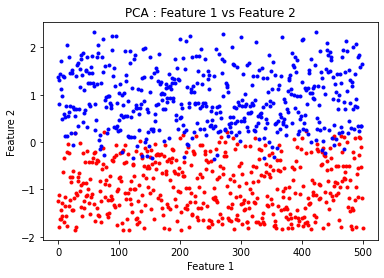

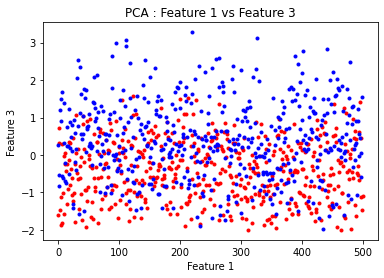

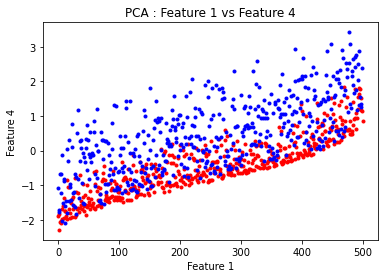

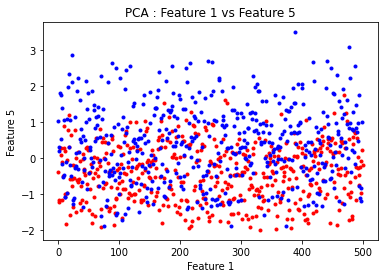

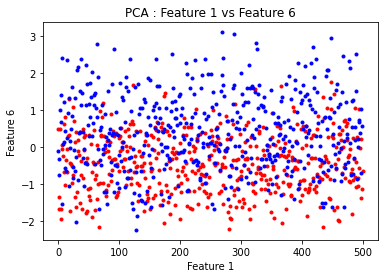

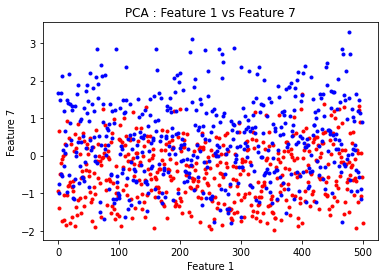

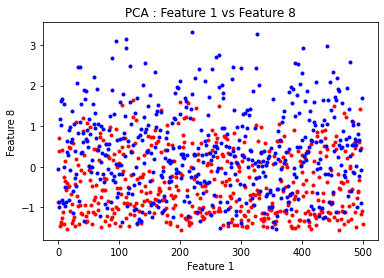

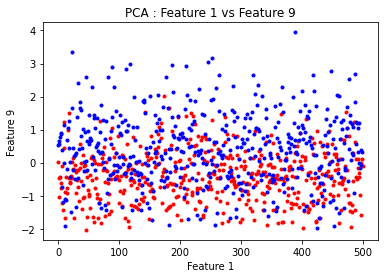

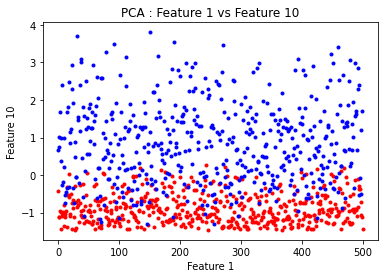

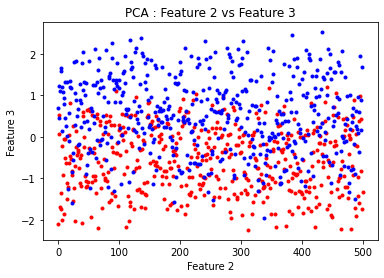

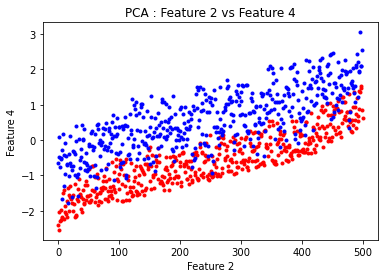

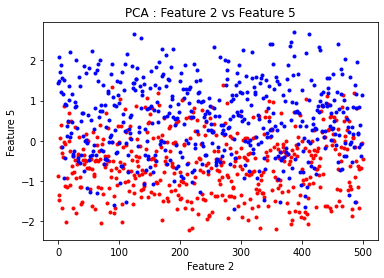

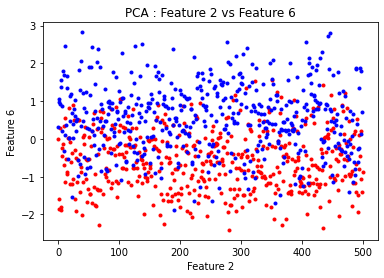

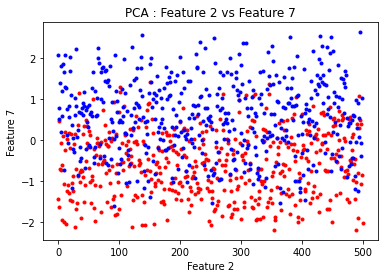

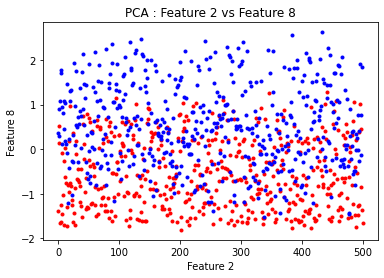

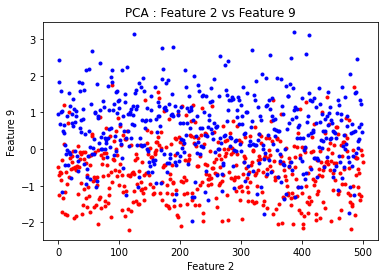

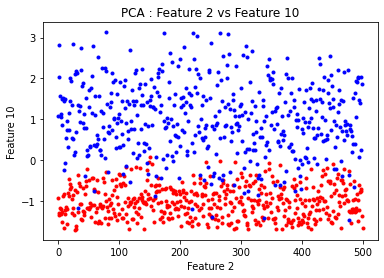

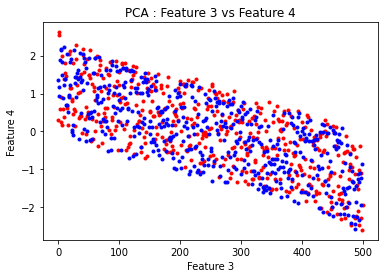

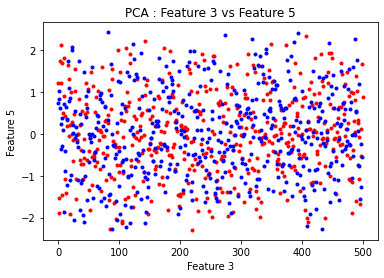

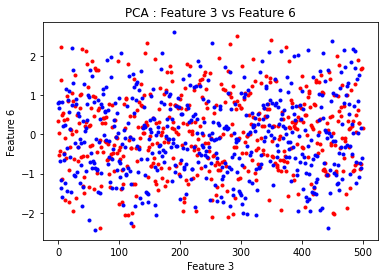

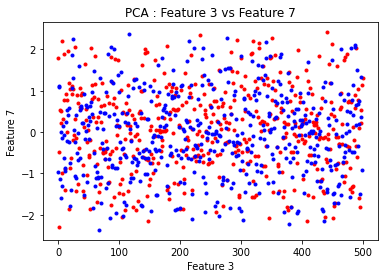

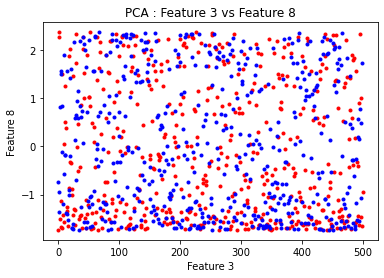

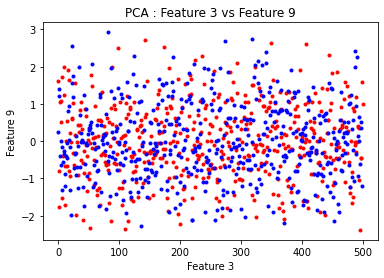

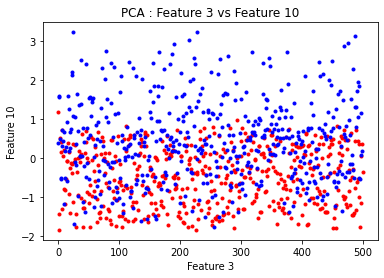

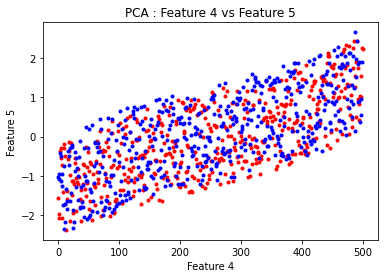

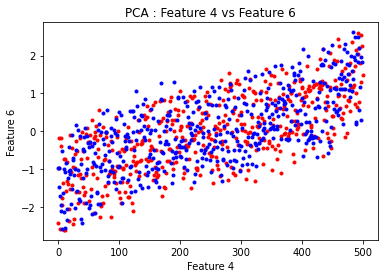

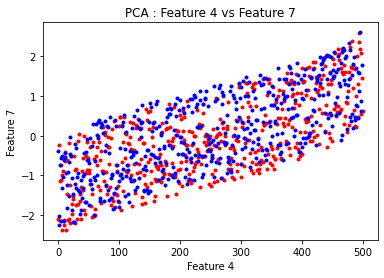

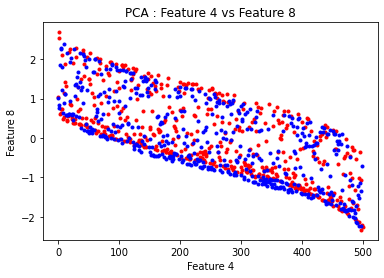

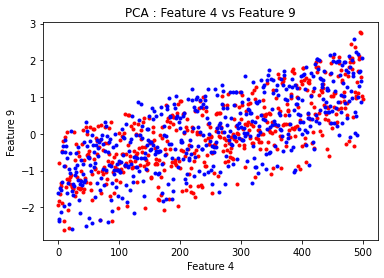

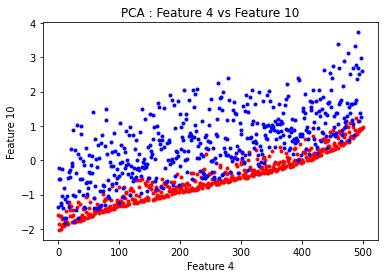

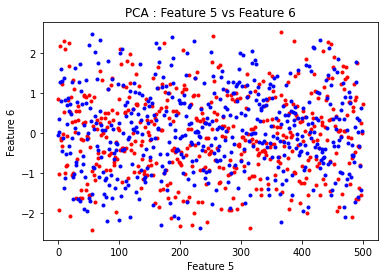

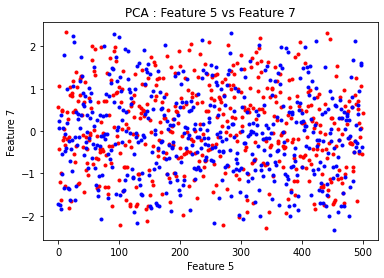

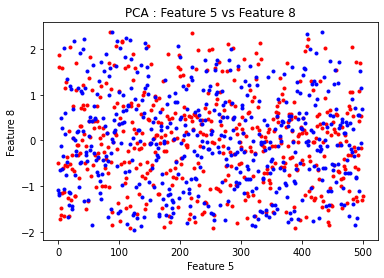

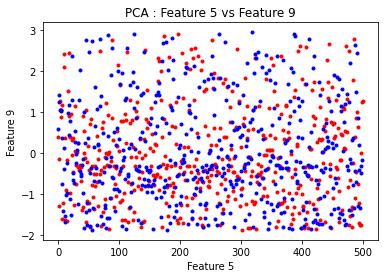

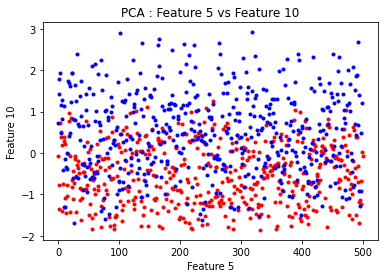

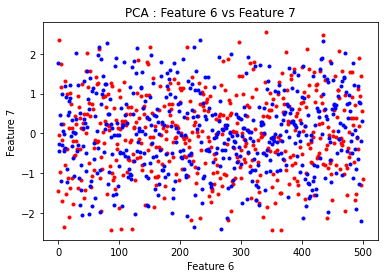

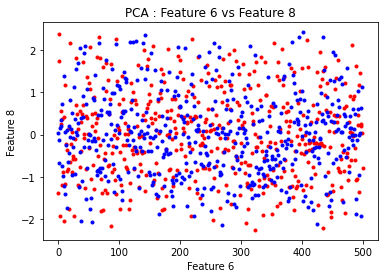

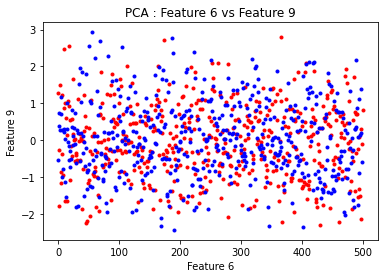

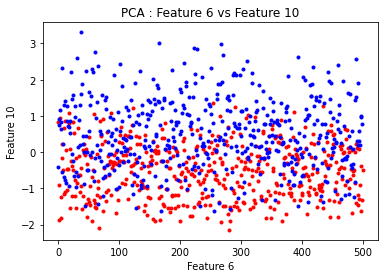

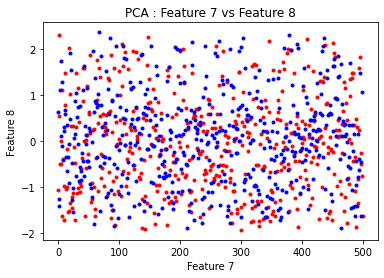

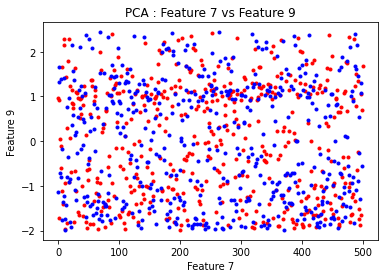

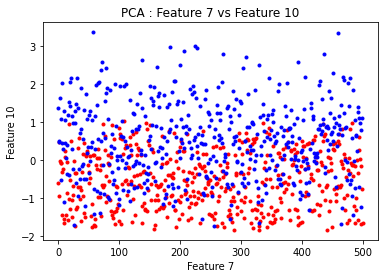

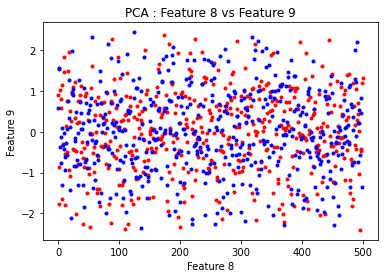

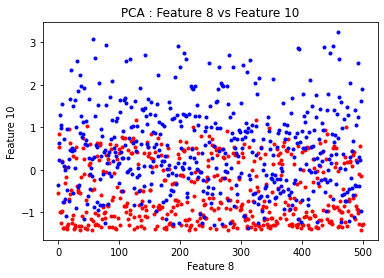

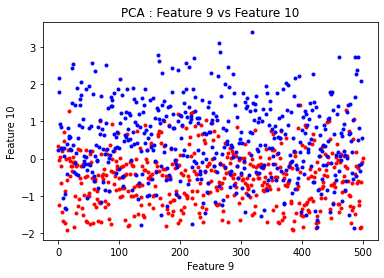

In [65]:
for k in range(1,11):
    for j in range(k+1,11):
        features=[str(k),str(j)]
        x = df.loc[:,features].values
        x = StandardScaler().fit_transform(x)
        pca = PCA(n_components=1)
        principalComponents = pca.fit_transform(x)
        db = np.append(principalComponents,df[['Label']],axis=1)
        
        y3 = [db[i][0] for i in range(999) if db[i][1]==1]
        y4 = [db[i][0] for i in range(999) if db[i][1]==2]
        
        plt.plot(y3,'r.')
        plt.plot(y4,'b.')
        
        plt.title('PCA : Feature '+str(k)+' vs Feature '+str(j))
        plt.ylabel('Feature '+str(j))
        plt.xlabel('Feature '+str(k))
        
        plt.show()

In [88]:
nd = np.delete(d,0,1)
pca = PCA()
nd = pca.fit_transform(nd)
vr = pca.explained_variance_ratio_
print(vr)
idx = (-vr).argsort()[:2]
print('Feature '+str(idx[0]+1)+' & Feature '+str(idx[1]+1)+' classify the two labels perfectly.')

[7.13638235e-01 8.50604153e-02 4.56370210e-02 4.04899235e-02
 3.90254381e-02 3.14659501e-02 2.32686160e-02 1.80895829e-02
 3.01493695e-03 3.09881381e-04]
Feature 1 & Feature 2 classify the two labels perfectly.
